In [ ]:
import numpy as np
 
X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1],
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0],
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])
 
u1 = np.array([3.0, 3.0])
u2 = np.array([2.0, 2.0])
 
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))
 
def kmeans(X, u1, u2, max_iters=100, threshold=1e-4):
    centroids = np.array([u1, u2])
    prev_centroids = np.copy(centroids)
    
    for iteration in range(max_iters): 
        labels = []
        for x in X:
            distances = [euclidean_distance(x, centroid) for centroid in centroids]
            label = np.argmin(distances)
            labels.append(label)
        labels = np.array(labels)
 
        new_centroids = []
        for i in range(2):
            cluster_points = X[labels == i]
            new_centroid = np.mean(cluster_points, axis=0) if cluster_points.size > 0 else centroids[i]
            new_centroids.append(new_centroid)
        new_centroids = np.array(new_centroids)
         
        if np.all(np.abs(new_centroids - prev_centroids) < threshold):
            print(f"Converged in {iteration + 1} iterations.")
            break
        
        prev_centroids = np.copy(new_centroids)
        centroids = new_centroids
    
    return centroids, labels 
final_centroids, final_labels = kmeans(X, u1, u2)

print("Final Centroids:")
print(final_centroids)
 
print("\nData point labels:")
for i, label in enumerate(final_labels):
    print(f"Data point {X[i]} is assigned to cluster {label}")


Converged in 3 iterations.
Final Centroids:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]

Data point labels:
Data point [5.1 3.5] is assigned to cluster 0
Data point [4.9 3. ] is assigned to cluster 0
Data point [5.8 2.7] is assigned to cluster 0
Data point [6. 3.] is assigned to cluster 0
Data point [6.7 3.1] is assigned to cluster 0
Data point [4.5 2.3] is assigned to cluster 0
Data point [6.1 2.8] is assigned to cluster 0
Data point [5.2 3.2] is assigned to cluster 0
Data point [5.5 2.6] is assigned to cluster 0
Data point [5. 2.] is assigned to cluster 0
Data point [8.  0.5] is assigned to cluster 0
Data point [7.5 0.8] is assigned to cluster 0
Data point [ 8.1 -0.1] is assigned to cluster 0
Data point [2.5 3.5] is assigned to cluster 0
Data point [1. 3.] is assigned to cluster 1
Data point [ 4.5 -1. ] is assigned to cluster 1
Data point [ 3.  -0.5] is assigned to cluster 1
Data point [ 5.1 -0.2] is assigned to cluster 1
Data point [ 6.  -1.5] is assigned to cluster 1
Dat

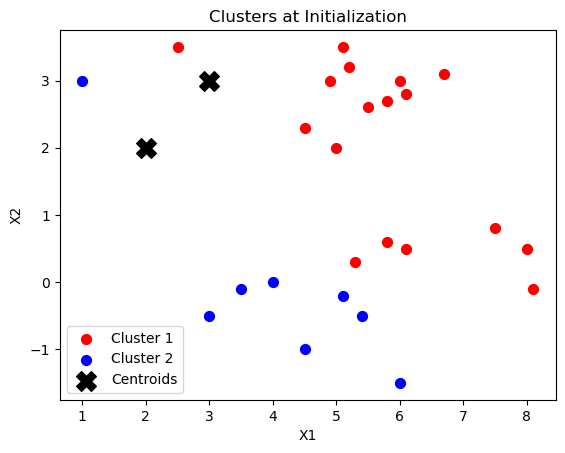

Converged in 3 iterations.


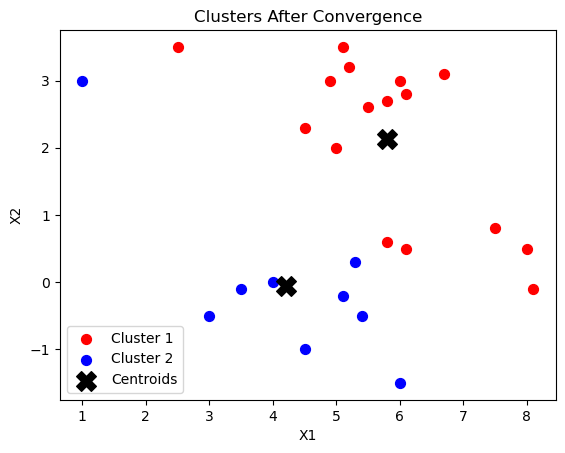

Final Centroids:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


In [3]:
import matplotlib.pyplot as plt

def plot_clusters(X, centroids, labels, title): 
    colors = ['r', 'b', 'g', 'y', 'c', 'm']
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='X', label='Centroids')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()
 
initial_centroids = np.array([u1, u2])
initial_labels = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in initial_centroids]) for x in X])
plot_clusters(X, initial_centroids, initial_labels, "Clusters at Initialization")
 
final_centroids, final_labels = kmeans(X, u1, u2)
plot_clusters(X, final_centroids, final_labels, "Clusters After Convergence")

print("Final Centroids:")
print(final_centroids)

Converged in 3 iterations.


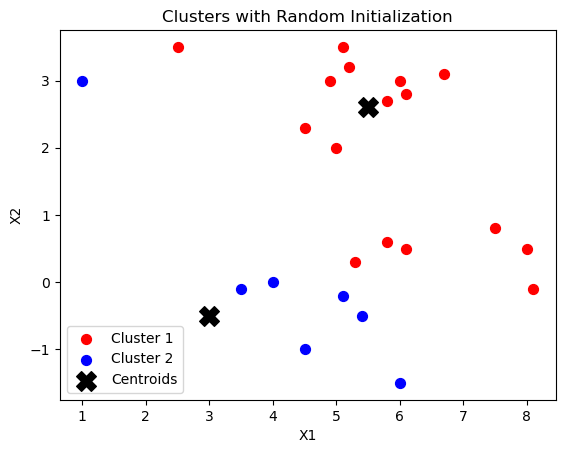

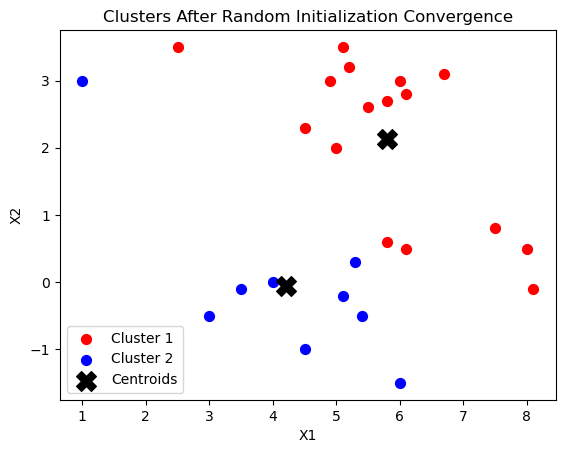

Final Centroids with Random Initialization:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


In [4]:
np.random.seed(42)
random_centroids = X[np.random.choice(X.shape[0], 2, replace=False)]

random_final_centroids, random_final_labels = kmeans(X, random_centroids[0], random_centroids[1])

plot_clusters(X, random_centroids, initial_labels, "Clusters with Random Initialization")
plot_clusters(X, random_final_centroids, random_final_labels, "Clusters After Random Initialization Convergence")

print("Final Centroids with Random Initialization:")
print(random_final_centroids)

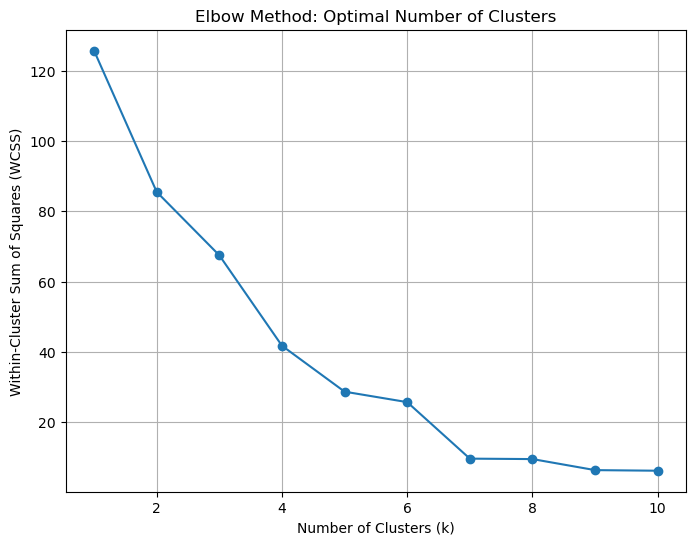

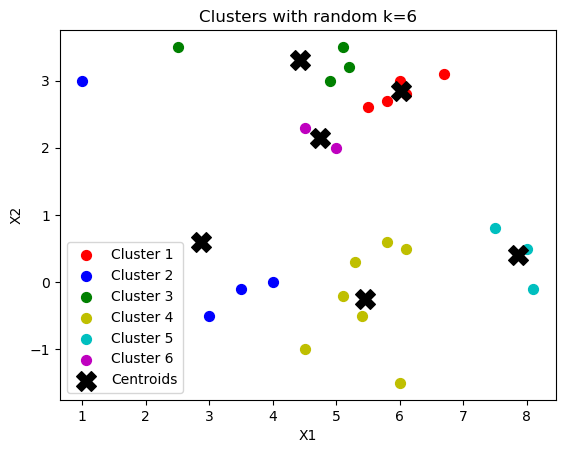

In [ ]:
def calculate_wcss(X, max_clusters): 
    wcss = []
    for k in range(1, max_clusters + 1):
        np.random.seed(42)
        initial_centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        final_centroids, labels = kmeans_multiple_clusters(X, initial_centroids, k)
        wcss.append(np.sum([np.sum((X[labels == i] - final_centroids[i])**2) for i in range(k)]))
    return wcss

def kmeans_multiple_clusters(X, initial_centroids, k, max_iters=100, threshold=1e-4): 
    centroids = np.array(initial_centroids)
    prev_centroids = np.copy(centroids)
    for iteration in range(max_iters): 
        labels = np.array([np.argmin([euclidean_distance(x, c) for c in centroids]) for x in X]) 
        new_centroids = np.array([np.mean(X[labels == i], axis=0) if len(X[labels == i]) > 0 else c
                                  for i, c in enumerate(centroids)]) 
        if np.all(np.abs(new_centroids - prev_centroids) < threshold):
            break
        prev_centroids = np.copy(new_centroids)
    return new_centroids, labels
 
max_clusters = 10
wcss = calculate_wcss(X, max_clusters)
 
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid()
plt.show()
 
optimal_k = 4 
np.random.seed(42)
initial_centroids_optimal = X[np.random.choice(X.shape[0], optimal_k, replace=False)]
optimal_centroids, optimal_labels = kmeans_multiple_clusters(X, initial_centroids_optimal, optimal_k)
plot_clusters(X, optimal_centroids, optimal_labels, f"Clusters with Optimal k={optimal_k}")
